# Multipe Linear Regression

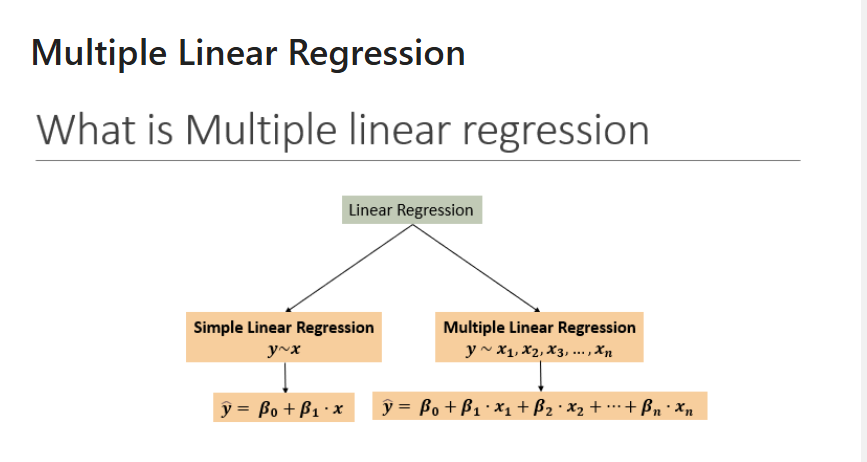

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# STEP 1 Data Ingestion (Rading csv file)

In [2]:
 import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head() 

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


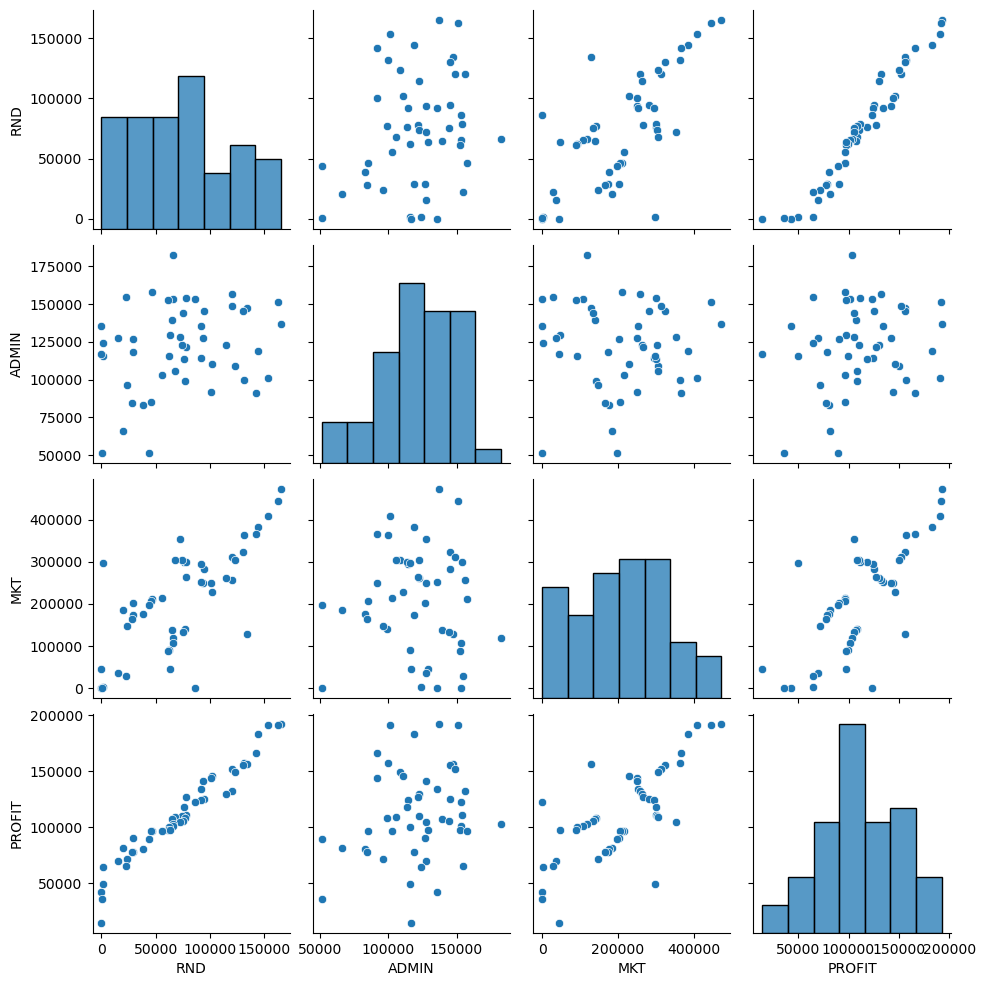

In [3]:
import seaborn as sns
sns.pairplot(data=df)

# Step 2 - Perform basic daat quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

# Step 3 - Seperate X and Y (PROFIT)

1. PROFIT ~ RND,ADMIN,MKT
2. PROFIT_PRED = B0+B1xRND + B2xADMIN + B3xMKT

In [7]:
X = df[["RND","ADMIN","MKT"]]
Y = df[["PROFIT"]]

In [9]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [10]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Step 4 - Build the model 

In [11]:
 from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [12]:
model.intercept_

array([50122.19298987])

In [13]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [14]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

# PROFIT_PREED = 50122.19 + 0.8057xRND - 0.0268xADMIN + 0.0272xMKT

1.If RND increases by 1 unit profit will increase by 0.8057 units

2.If ADMIN increase by 1 unit profit will decrease by 0.0268 units

3.If MKT increase by 1 unit profit will increase by 0.0272 units

# Step 5 - Model evaluation

In [15]:
model.score(X,Y)

0.9507459940683246

In [16]:
 from sklearn.metrics import (
  root_mean_squared_error,
  mean_absolute_error,
  mean_absolute_percentage_error,
  r2_score
 )

In [21]:
def evaluate_model(model,x,y):
    # predict the results using the model 
    ypred = model.predict(x)


    #calculate all metrics
    rmse = root_mean_squared_error(y,ypred)
    mae = mean_absolute_error(y,ypred)
    mape = mean_absolute_percentage_error(y,ypred)
    r2 = r2_score(y,ypred)


    #print all above terms
    print(f"RMSE : {rmse:.2F}")
    print(F"MAE : {mae:.2F}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2: .2%}")


In [18]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [19]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [22]:
evaluate_model(model,X,Y)

RMSE : 8855.34
MAE : 6471.45
MAPE : 10.60%
R2 :  95.07%


In [23]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [24]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Step 6 - Out of Sample prediction

In [25]:
 X.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [26]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [29]:
rnd = 1_60_000
admin = 80_000
mkt = 95_000
xnew = [[rnd,admin, mkt]]
pred = model.predict(xnew)
pred

array([[179477.98966088]])

In [31]:
### PROFIT_PRED = 50122.19 + 0.8057xRND - 0.0268xADMIN + 0.0272xMKT
50122.19 + 0.8057*1_60_000 - 0.0268*80_000 + 0.0272*95_000

179474.19